In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms,RoadSlope_100ms,Vehicle_Mass
0,902.5,67.72,1971.9360,-140.0,9.999747,0,3,0,0,1.5,38.0
1,1241.0,63.87,2604.0000,-196.0,9.999747,0,3,0,0,1.7,38.0
2,903.0,67.28,2208.0700,-140.0,9.999747,0,3,0,0,1.3,38.0
3,934.5,68.34,0.0000,-140.0,9.999747,0,3,0,0,-2.7,49.0
4,969.0,61.28,392.5794,-112.0,9.999747,0,3,0,0,2.3,49.0


In [ ]:
df.shape

(8496, 11)

# Kiểm tra dữ liệu

In [ ]:
df.isna().sum()

Epm_nEng_100ms                0
VehV_v_100ms                  0
ActMod_trqInr_100ms           0
RngMod_trqCrSmin_100ms        0
CoVeh_trqAcs_100ms            0
Clth_st_100ms                 0
CoEng_st_100ms                0
Com_rTSC1VRVCURtdrTq_100ms    0
Com_rTSC1VRRDTrqReq_100ms     0
RoadSlope_100ms               0
Vehicle_Mass                  0
dtype: int64

In [ ]:
X = df.iloc[:,0:9]
y_linear = df.iloc[:,9]
y_classification = df.iloc[:,10]

In [ ]:
col_names = df.columns

col_names

Index(['Epm_nEng_100ms', 'VehV_v_100ms', 'ActMod_trqInr_100ms',
       'RngMod_trqCrSmin_100ms', 'CoVeh_trqAcs_100ms', 'Clth_st_100ms',
       'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms',
       'Com_rTSC1VRRDTrqReq_100ms', 'RoadSlope_100ms', 'Vehicle_Mass'],
      dtype='object')

In [ ]:
# find categorical variables
categorical = [var for var in X.columns if X[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [ ]:
# find numerical variables
numerical = [var for var in X.columns if X[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['Epm_nEng_100ms', 'VehV_v_100ms', 'ActMod_trqInr_100ms', 'RngMod_trqCrSmin_100ms', 'CoVeh_trqAcs_100ms', 'Clth_st_100ms', 'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms', 'Com_rTSC1VRRDTrqReq_100ms']


In [ ]:
X.head()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms
0,902.5,67.72,1971.9360,-140.0,9.999747,0,3,0,0
1,1241.0,63.87,2604.0000,-196.0,9.999747,0,3,0,0
2,903.0,67.28,2208.0700,-140.0,9.999747,0,3,0,0
3,934.5,68.34,0.0000,-140.0,9.999747,0,3,0,0
4,969.0,61.28,392.5794,-112.0,9.999747,0,3,0,0


In [ ]:
print(round(df[numerical].describe()),2)

       Epm_nEng_100ms  VehV_v_100ms  ActMod_trqInr_100ms  \
count          8496.0        8496.0               8496.0   
mean           1105.0          64.0               1420.0   
std             157.0          11.0                989.0   
min             482.0          38.0                  0.0   
25%             948.0          57.0                364.0   
50%            1145.0          67.0               1628.0   
75%            1192.0          72.0               2349.0   
max            2120.0          89.0               2688.0   

       RngMod_trqCrSmin_100ms  CoVeh_trqAcs_100ms  Clth_st_100ms  \
count                  8496.0              8496.0         8496.0   
mean                   -159.0                10.0            0.0   
std                      26.0                 0.0            0.0   
min                    -308.0                10.0            0.0   
25%                    -168.0                10.0            0.0   
50%                    -168.0                10.0  

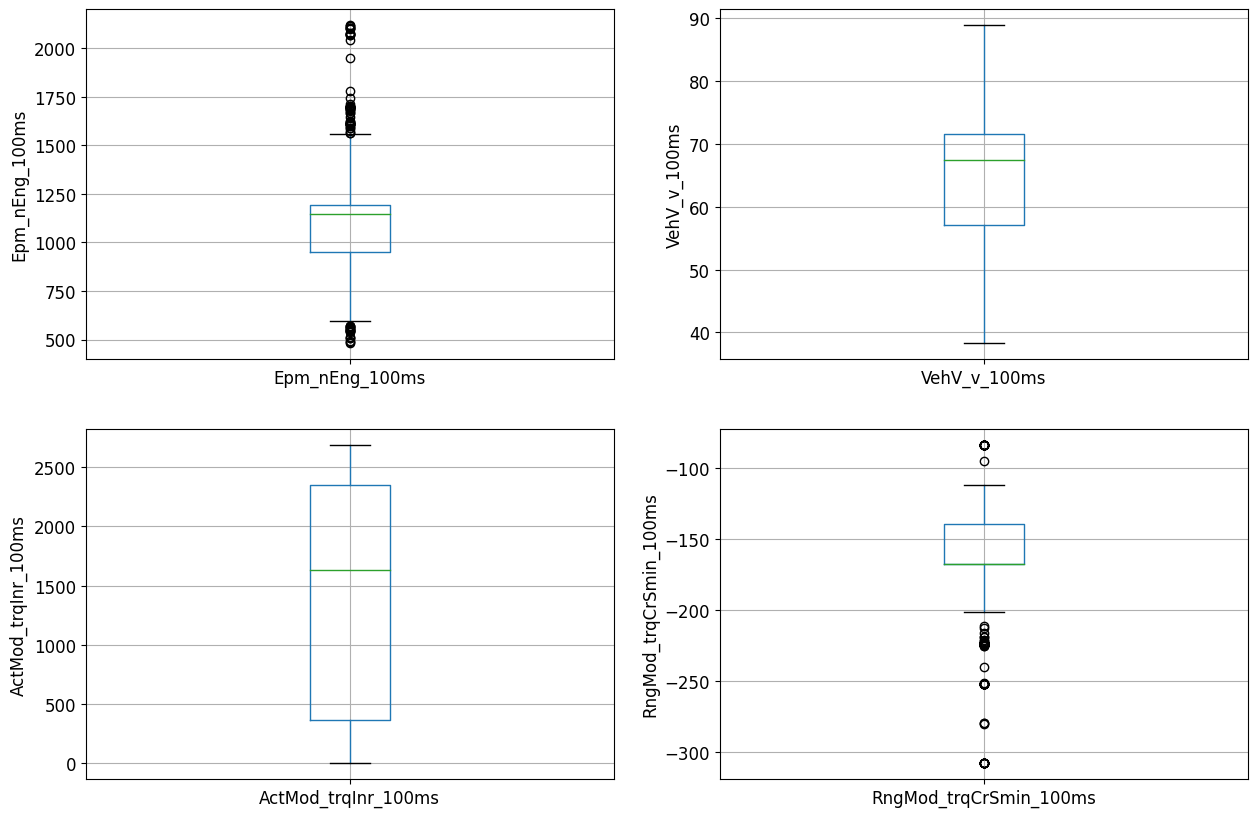

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = X.boxplot(column='Epm_nEng_100ms')
fig.set_title('')
fig.set_ylabel('Epm_nEng_100ms')


plt.subplot(2, 2, 2)
fig = X.boxplot(column='VehV_v_100ms')
fig.set_title('')
fig.set_ylabel('VehV_v_100ms')


plt.subplot(2, 2, 3)
fig = X.boxplot(column='ActMod_trqInr_100ms')
fig.set_title('')
fig.set_ylabel('ActMod_trqInr_100ms')


plt.subplot(2, 2, 4)
fig = X.boxplot(column='RngMod_trqCrSmin_100ms')
fig.set_title('')
fig.set_ylabel('RngMod_trqCrSmin_100ms')

plt.savefig('boxplot1')

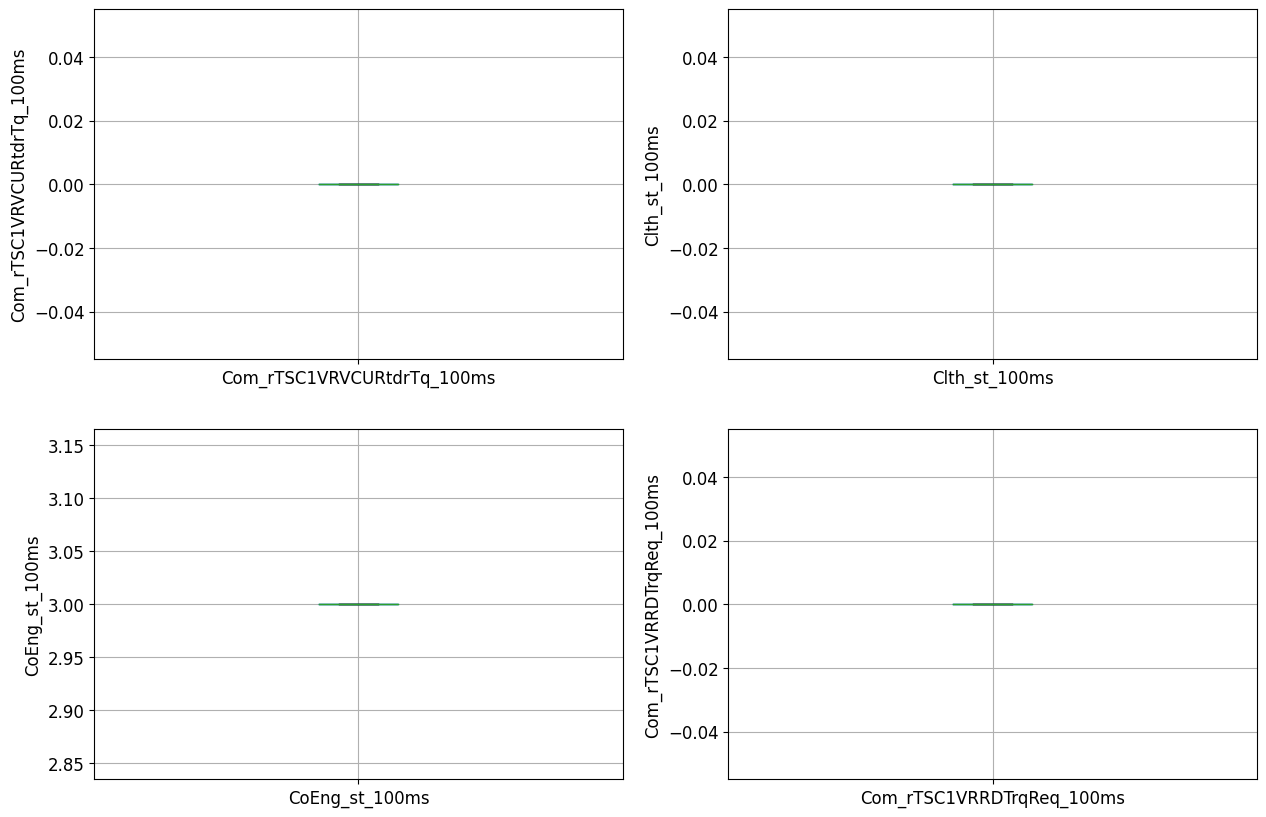

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = X.boxplot(column='Com_rTSC1VRVCURtdrTq_100ms')
fig.set_title('')
fig.set_ylabel('Com_rTSC1VRVCURtdrTq_100ms')


plt.subplot(2, 2, 2)
fig = X.boxplot(column='Clth_st_100ms')
fig.set_title('')
fig.set_ylabel('Clth_st_100ms')


plt.subplot(2, 2, 3)
fig = X.boxplot(column='CoEng_st_100ms')
fig.set_title('')
fig.set_ylabel('CoEng_st_100ms')


plt.subplot(2, 2, 4)
fig = X.boxplot(column='Com_rTSC1VRRDTrqReq_100ms')
fig.set_title('')
fig.set_ylabel('Com_rTSC1VRRDTrqReq_100ms')

plt.savefig('boxplot2')

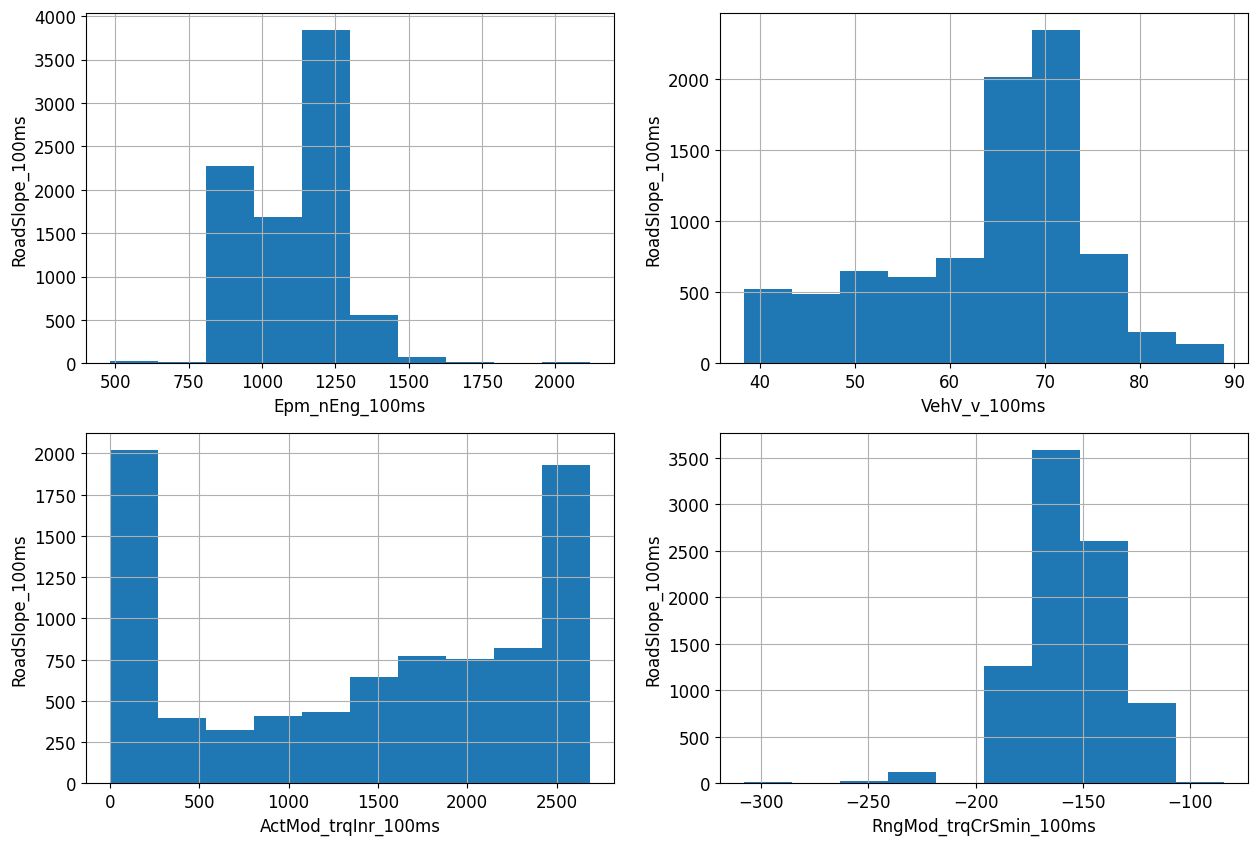

In [ ]:
plt.figure(figsize=(15,10))
# (['Epm_nEng_100ms', 'VehV_v_100ms', 'ActMod_trqInr_100ms',
#        'RngMod_trqCrSmin_100ms', 'CoVeh_trqAcs_100ms', 'Clth_st_100ms',
#        'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms',
#        'Com_rTSC1VRRDTrqReq_100ms', 'RoadSlope_100ms', 'Vehicle_Mass'],

plt.subplot(2, 2, 1)
fig = df.Epm_nEng_100ms.hist(bins=10)
fig.set_xlabel('Epm_nEng_100ms')
fig.set_ylabel('RoadSlope_100ms')


plt.subplot(2, 2, 2)
fig = df.VehV_v_100ms.hist(bins=10)
fig.set_xlabel('VehV_v_100ms')
fig.set_ylabel('RoadSlope_100ms')


plt.subplot(2, 2, 3)
fig = df.ActMod_trqInr_100ms.hist(bins=10)
fig.set_xlabel('ActMod_trqInr_100ms')
fig.set_ylabel('RoadSlope_100ms')


plt.subplot(2, 2, 4)
fig = df.RngMod_trqCrSmin_100ms.hist(bins=10)
fig.set_xlabel('RngMod_trqCrSmin_100ms')
fig.set_ylabel('RoadSlope_100ms')

plt.savefig('hist1')

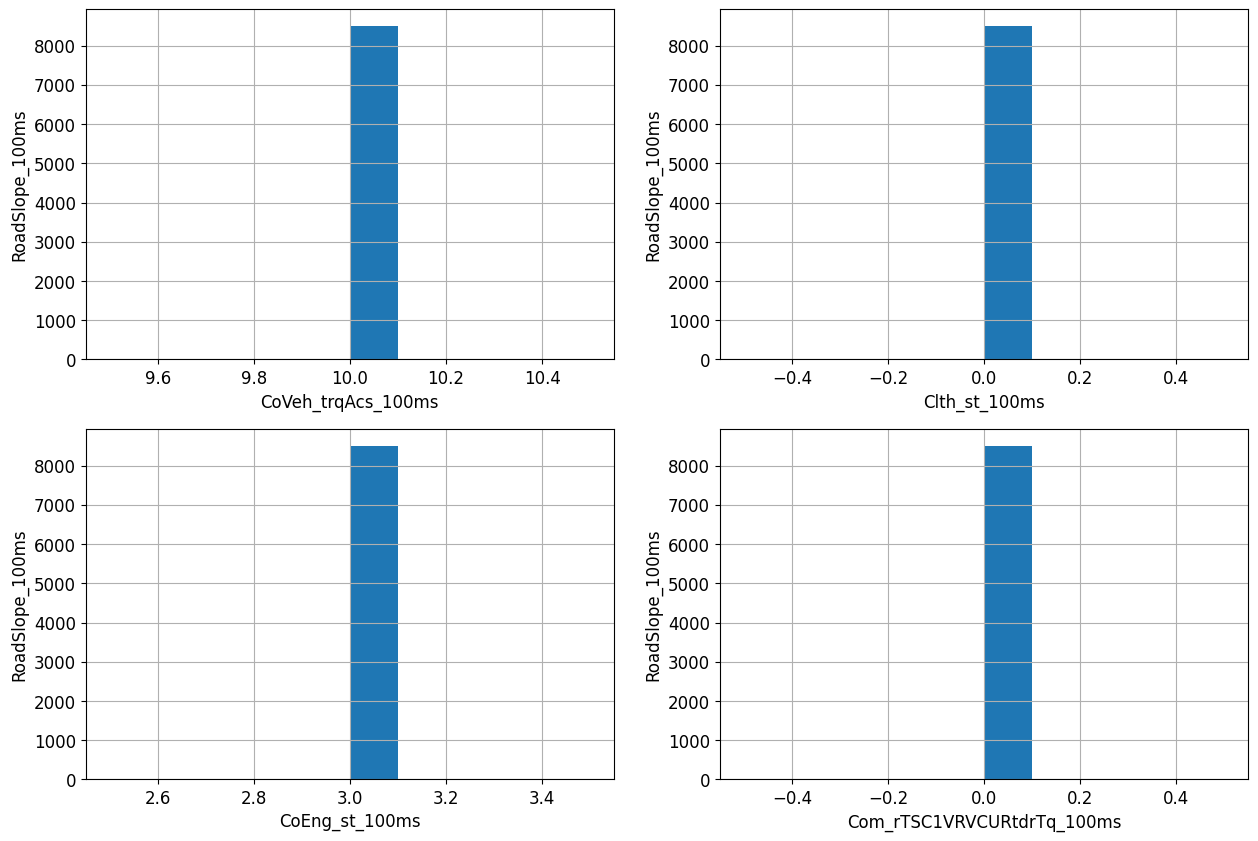

In [ ]:
plt.figure(figsize=(15,10))
# (['Epm_nEng_100ms', 'VehV_v_100ms', 'ActMod_trqInr_100ms',
#        'RngMod_trqCrSmin_100ms', 'CoVeh_trqAcs_100ms', 'Clth_st_100ms',
#        'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms',
#        'Com_rTSC1VRRDTrqReq_100ms', 'RoadSlope_100ms', 'Vehicle_Mass'],

plt.subplot(2, 2, 1)
fig = df.CoVeh_trqAcs_100ms.hist(bins=10)
fig.set_xlabel('CoVeh_trqAcs_100ms')
fig.set_ylabel('RoadSlope_100ms')


plt.subplot(2, 2, 2)
fig = df.Clth_st_100ms.hist(bins=10)
fig.set_xlabel('Clth_st_100ms')
fig.set_ylabel('RoadSlope_100ms')


plt.subplot(2, 2, 3)
fig = df.CoEng_st_100ms.hist(bins=10)
fig.set_xlabel('CoEng_st_100ms')
fig.set_ylabel('RoadSlope_100ms')


plt.subplot(2, 2, 4)
fig = df.Com_rTSC1VRVCURtdrTq_100ms.hist(bins=10)
fig.set_xlabel('Com_rTSC1VRVCURtdrTq_100ms')
fig.set_ylabel('RoadSlope_100ms')

plt.savefig('hist2')

Text(0, 0.5, 'RoadSlope_100ms')

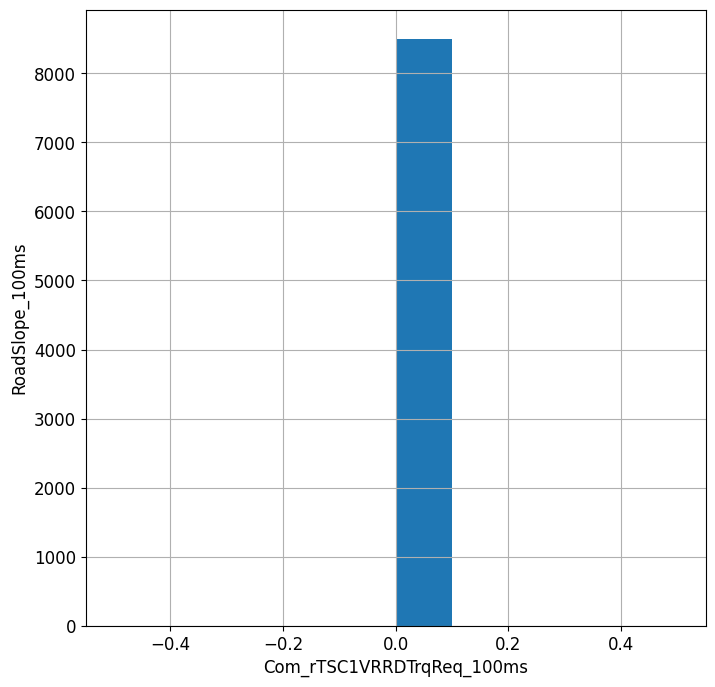

In [ ]:
plt.figure(figsize=(8,8))
fig = df.Com_rTSC1VRRDTrqReq_100ms.hist(bins=10)
fig.set_xlabel('Com_rTSC1VRRDTrqReq_100ms')
fig.set_ylabel('RoadSlope_100ms')

In [ ]:
IQR = df.Epm_nEng_100ms.quantile(0.75) - df.Epm_nEng_100ms.quantile(0.25)
Lower_fence = df.Epm_nEng_100ms.quantile(0.25) - (IQR * 3)
Upper_fence = df.Epm_nEng_100ms.quantile(0.75) + (IQR * 3)
print('Epm_nEng_100ms outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Epm_nEng_100ms outliers are values < 216.0 or > 1924.875


In [ ]:
IQR = df.RngMod_trqCrSmin_100ms.quantile(0.75) - df.RngMod_trqCrSmin_100ms.quantile(0.25)
Lower_fence = df.RngMod_trqCrSmin_100ms.quantile(0.25) - (IQR * 3)
Upper_fence = df.RngMod_trqCrSmin_100ms.quantile(0.75) + (IQR * 3)
print('RngMod_trqCrSmin_100ms outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

RngMod_trqCrSmin_100ms outliers are values < -252.0 or > -56.0


In [ ]:
X = X.drop(['CoVeh_trqAcs_100ms', 'Clth_st_100ms', 'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms', 'Com_rTSC1VRRDTrqReq_100ms'], axis = 1)

In [ ]:
X_train, X_test, y_train_class, y_test_class, y_train_linear, y_test_linear = train_test_split(
...     X, y_classification, y_linear, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((6796, 4), (1700, 4))

# Feature object

In [ ]:
X_train.dtypes

Epm_nEng_100ms            float64
VehV_v_100ms              float64
ActMod_trqInr_100ms       float64
RngMod_trqCrSmin_100ms    float64
dtype: object

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Epm_nEng_100ms',
 'VehV_v_100ms',
 'ActMod_trqInr_100ms',
 'RngMod_trqCrSmin_100ms']

In [ ]:
X_train[numerical].isnull().sum()

Epm_nEng_100ms            0
VehV_v_100ms              0
ActMod_trqInr_100ms       0
RngMod_trqCrSmin_100ms    0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

Epm_nEng_100ms            0
VehV_v_100ms              0
ActMod_trqInr_100ms       0
RngMod_trqCrSmin_100ms    0
dtype: int64

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Epm_nEng_100ms'] = max_value(df3, 'Epm_nEng_100ms', 1924.875)
    df3['RngMod_trqCrSmin_100ms'] = max_value(df3, 'RngMod_trqCrSmin_100ms', -56)

In [ ]:
X_train.Epm_nEng_100ms.max(), X_test.Epm_nEng_100ms.max()

(1924.875, 1924.875)

In [ ]:
X_train.RngMod_trqCrSmin_100ms.max(), X_test.RngMod_trqCrSmin_100ms.max()

(-84.0, -84.0)

In [ ]:
X_train[numerical].describe()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
count,6796.000000,6796.000000,6796.000000,6796.000000
mean,1102.443754,64.438992,1408.981414,-158.968887
std,155.170728,10.642140,988.613374,26.298610
min,481.500000,38.310000,0.000000,-308.000000
25%,944.000000,57.337500,339.500000,-168.000000
50%,1144.750000,67.395000,1602.184000,-168.000000
75%,1191.000000,71.580000,2327.500000,-140.000000
max,1924.875000,88.930000,2688.000000,-84.000000


# Chuẩn hóa dữ liệu

In [ ]:
def scale(df: pd.DataFrame, scaler) -> pd.DataFrame:
    scaled_data = df.apply(lambda col: scaler.fit_transform(col.values.reshape(-1, 1)).flatten())
    return scaled_data

In [ ]:
X_train = scale(X_train, MinMaxScaler())
# X_train = scale(X_train, StandardScaler())
# X_train = scale(X_train, RobustScaler())

In [ ]:
X_test = scale(X_test, MinMaxScaler())
# X_test = scale(X_test, StandardScaler())
# X_test = scale(X_test, RobustScaler())

In [ ]:
X_train

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
6260,0.466615,0.654484,0.813802,0.625
8472,0.469732,0.064006,0.979167,0.875
2067,0.467308,0.654089,0.824219,0.625
5632,0.402875,0.783682,0.000000,0.750
1047,0.471811,0.661004,0.449219,0.625
...,...,...,...,...
5734,0.284749,0.553536,0.199219,0.625
5191,0.387980,0.316871,0.763348,0.750
5390,0.281632,0.554326,0.042100,0.625
860,0.278860,0.555314,0.885417,0.750


# Regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# clf = LinearRegression().fit(X_train, y_train_class)
# clf_1 = Lasso()
# clf_2 = Ridge()
# clf_3 = ElasticNet()

In [ ]:
def get_overall_recall_score(y_true, y_pred):
    r = recall_score(y_test_class, y_pred_test, average=None)
    return np.sqrt(r[0]*r[1])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = DecisionTreeClassifier()


# fit the model
logreg.fit(X_train, y_train_class)

DecisionTreeClassifier()

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([49., 38., 38., ..., 38., 49., 38.])

In [ ]:
get_overall_recall_score(y_test_class, y_pred_test)

0.9969452403195355

In [ ]:
logreg.predict_proba(X_test)[:,0]

array([0., 1., 1., ..., 1., 0., 1.])

In [ ]:
logreg.predict_proba(X_test)[:,1]

array([1., 0., 0., ..., 0., 1., 0.])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_class, y_pred_test)))

Model accuracy score: 0.9971


In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([38., 49., 38., ..., 38., 38., 38.])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_class, y_pred_train)))

Training-set accuracy score: 1.0000


# Check overfitting and underfitting

In [ ]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train_class)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test_class)))

Training set score: 1.0000
Test set score: 0.9971


## C=100

In [ ]:
# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train_class)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
y_pred_class = logreg100.predict(X_test)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train_class)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test_class)))

Training set score: 0.9762
Test set score: 0.9765


In [ ]:
get_overall_recall_score(y_test_class, y_pred_class)

0.9969452403195355

## C=0.01

In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train_class)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train_class)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test_class)))

Training set score: 0.8424
Test set score: 0.8394


In [ ]:
# check class distribution in test set

y_test_class.value_counts()

38.0    1115
49.0     585
Name: Vehicle_Mass, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


# confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1112    3]
 [   2  583]]

True Positives(TP) =  1112

True Negatives(TN) =  583

False Positives(FP) =  3

False Negatives(FN) =  2


<Axes: >

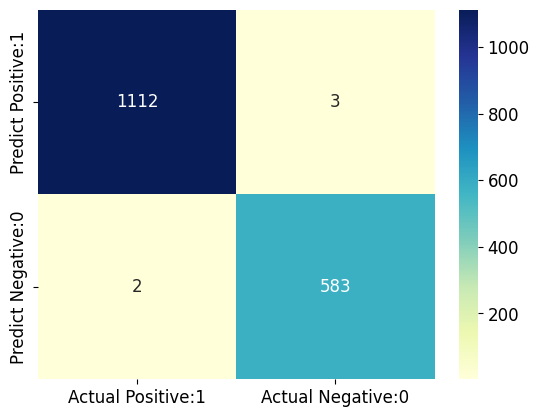

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred_test))

              precision    recall  f1-score   support

        38.0       1.00      1.00      1.00      1115
        49.0       0.99      1.00      1.00       585

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9971


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0029


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9973


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9982


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9982


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0051


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9949


# Adjusting the threshold level

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,0.0,1.0
8,1.0,0.0
9,0.0,1.0


In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1.])

In [ ]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

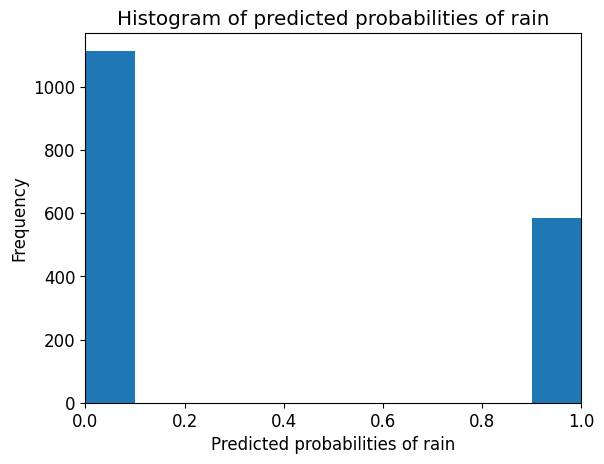

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor(criterion='squared_error', max_features='log2')

In [ ]:
clf.fit(X_train, y_train_class)

pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_class, pred))

              precision    recall  f1-score   support

        38.0       1.00      1.00      1.00      1115
        49.0       1.00      1.00      1.00       585

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



# Classification

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def predicted_slope(y_pred, y_test):
  e = abs(y_test - y_pred)

  def changed(e):
    if 0 <= e and e < 0.001:
      return 1
    if 0.001 <= e and e < 0.01:
      return 0.5
    if 0.01 <= e and e < 0.02:
      return 0.25
    if 0.02 <= e and e < 0.05:
      return 0
    if 0.05 <= e and e < 0.3:
      return -0.25
    if 0.3 <= e: return -0.5
  e = e.values
  for idx, value in enumerate(e):
    e[idx] = changed(value)
  print(e)
  return e.mean()

In [ ]:
regr = DecisionTreeRegressor(criterion='squared_error', max_features='log2')

regr.fit(X_train.values, y_train_linear)

DecisionTreeRegressor(max_features='log2')

In [ ]:
X_train

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
6260,0.466615,0.654484,0.813802,0.625
8472,0.469732,0.064006,0.979167,0.875
2067,0.467308,0.654089,0.824219,0.625
5632,0.402875,0.783682,0.000000,0.750
1047,0.471811,0.661004,0.449219,0.625
...,...,...,...,...
5734,0.284749,0.553536,0.199219,0.625
5191,0.387980,0.316871,0.763348,0.750
5390,0.281632,0.554326,0.042100,0.625
860,0.278860,0.555314,0.885417,0.750


In [ ]:
X_test

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms
6100,0.564948,0.288568,0.000000,0.750000
1127,0.293117,0.582476,0.730469,0.625000
1536,0.503184,0.723299,0.596656,0.500000
4808,0.454331,0.049248,0.979167,0.875000
2492,0.465847,0.657634,0.647135,0.625000
...,...,...,...,...
6004,0.425718,0.348695,0.970052,0.625000
4508,0.476664,0.435918,0.959635,0.625000
4694,0.488877,0.448774,0.293690,0.508657
3126,0.474919,0.067840,0.979167,0.875000


In [ ]:
regr.score(X_train.values, y_train_linear)

0.9998907356273637

In [ ]:
y_pred_linear = regr.predict(X_test.values)

In [ ]:
print('DecisionTreeRegressor score: ',  predicted_slope(y_pred_linear, y_test_linear))

[ 1.   1.   1.  ...  1.  -0.5  1. ]
DecisionTreeRegressor score:  0.4873529411764706


In [ ]:
mean_absolute_error(y_test_linear, y_pred_linear)

0.3200189905829413

# Linear regression

In [ ]:
regr = LinearRegression()

regr.fit(X_train.values, y_train_linear)

LinearRegression()

In [ ]:
y_pred_linear = regr.predict(X_test.values)

In [ ]:
print('LinearRegression score: ',  predicted_slope(y_pred_linear, y_test_linear))

[-0.5  -0.5  -0.25 ... -0.5   0.   -0.25]
LinearRegression score:  -0.42


In [ ]:
mean_absolute_error(y_test_linear, y_pred_linear)

0.9063804428348182

## Lasso

In [ ]:
ls = Lasso(alpha = 0.1)
ls.fit(X_train.values, y_train_linear)

Lasso(alpha=0.1)

In [ ]:
y_pred_linear = ls.predict(X_test.values)

In [ ]:
print('Lasso score: ',  predicted_slope(y_pred_linear, y_test_linear))

[-0.5  -0.5  -0.25 ... -0.5  -0.5  -0.25]
Lasso score:  -0.4436764705882353


In [ ]:
y_pred_linear

array([-0.20088059,  1.3387019 ,  0.62509847, ...,  0.32492083,
        3.22567783,  0.80225262])

In [ ]:
y_test_linear.values

array([1.7, 0.6, 0.4, ..., 1.5, 4.2, 0.6])

In [ ]:
mean_absolute_error(y_test_linear, y_pred_linear)

1.024835979274548

## ElasticNet

In [ ]:
regr = ElasticNet(random_state=42)
regr.fit(X_train, y_train_linear)

ElasticNet(random_state=42)

In [ ]:
print(regr.coef_)

[ 0.         -0.          0.15765992  0.        ]


In [ ]:
print(regr.intercept_)

0.78422318058748


In [ ]:
y_pred_linear = regr.predict(X_test)

In [ ]:
print('ElasticNet score: ',  predicted_slope(y_pred_linear, y_test_linear))

[-0.5  -0.25 -0.5  ... -0.5  -0.5  -0.25]
ElasticNet score:  -0.47147058823529414


In [ ]:
y_pred_linear

array([0.78422318, 0.89938883, 0.87829196, ..., 0.83052635, 0.93859852,
       0.87296836])

In [ ]:
y_test_linear.values

array([1.7, 0.6, 0.4, ..., 1.5, 4.2, 0.6])

In [ ]:
mean_absolute_error(y_test_linear, y_pred_linear)

1.7308515905254969